<font size=7><b>BME Spring 2025 Final Project: Cart-Pole Data Analysis

Congratulations! We are  now in the final stretch of the class! In this final notebook we wil provide you data recorded from an experiment performed in the lab and you will have the opportunity to work and analyze the real neural tissue activity that occurred over the course of this experiment. This notebook will function as a group project where you along with your team members will take this data along with the basic analysis techniques provided here, and devise your own techniques of analysis. Once you have done this and gathered all the information you can you will be asked to write a final paper explaining your methods and results. You will also be summarizing this paper into a short presentation to be done during our final time. 

<font color="red"><b>Note:</b>This is not necessarily a normal HW, it is supplementary to the final project which you may consider the "Final" for the class, however it is required to be completed to receive full marks for this project. Think of this as showing your work, here you can document all the code used to produce the figures and data used in your project. As such this  is due the same time as your Final Paper, **tuesday (June 11), at 11:59pm**. This is a group assignment so make sure to work together closely with a team of 4-5 people.

Loading: final_analysis_source_code.ipynb...


/srv/conda/envs/notebook/lib/python3.10/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


interactive(children=(Dropdown(description='sd_name', options=('Baseline', 'Dataset 6', 'Dataset 7', 'Dataset …

108
Generating Electrode Role Plot...


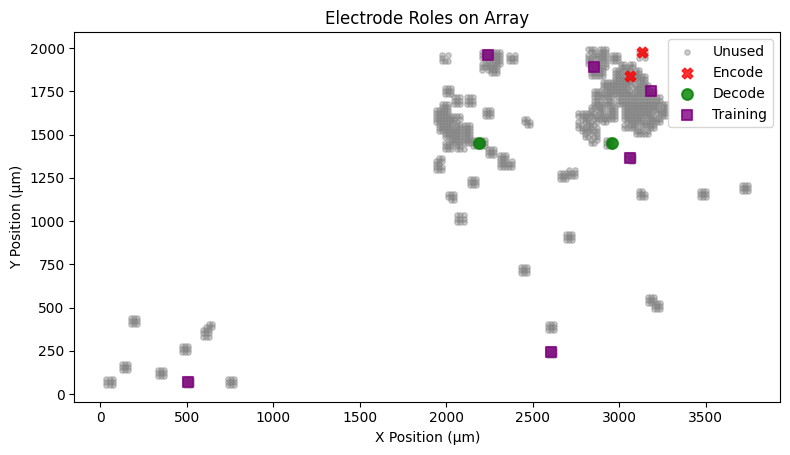

Calculating metrics (FR, STTC)...
Generating Firing Rate Plot...


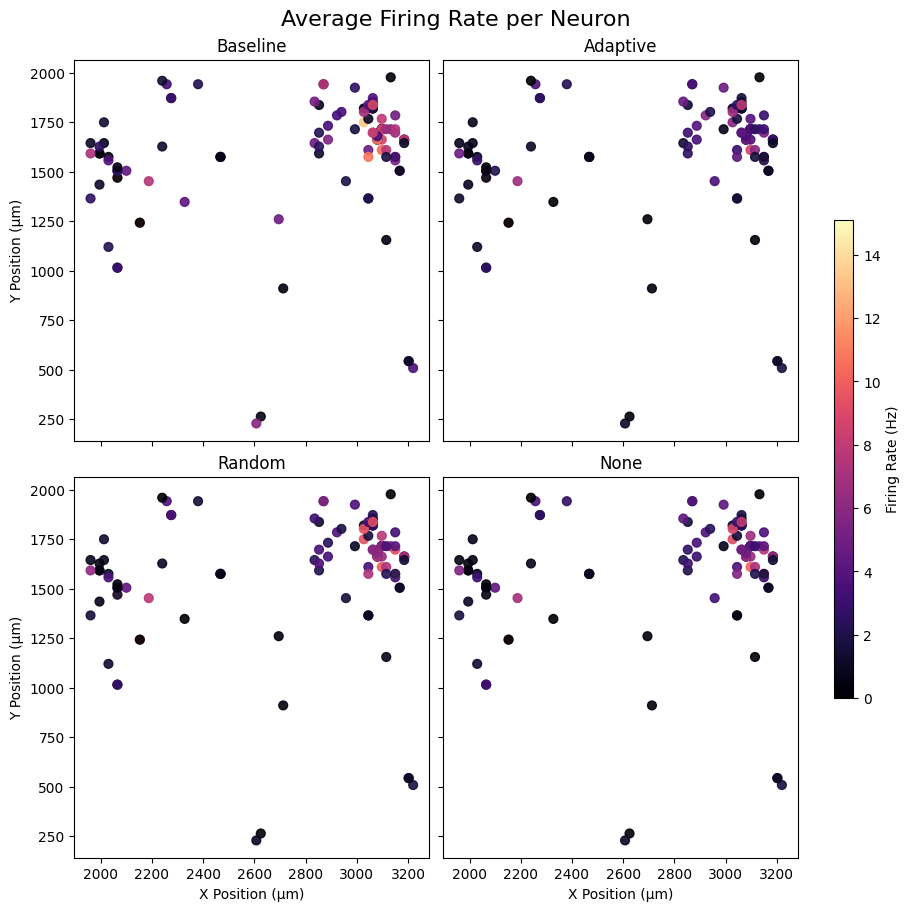

Generating STTC Plot...


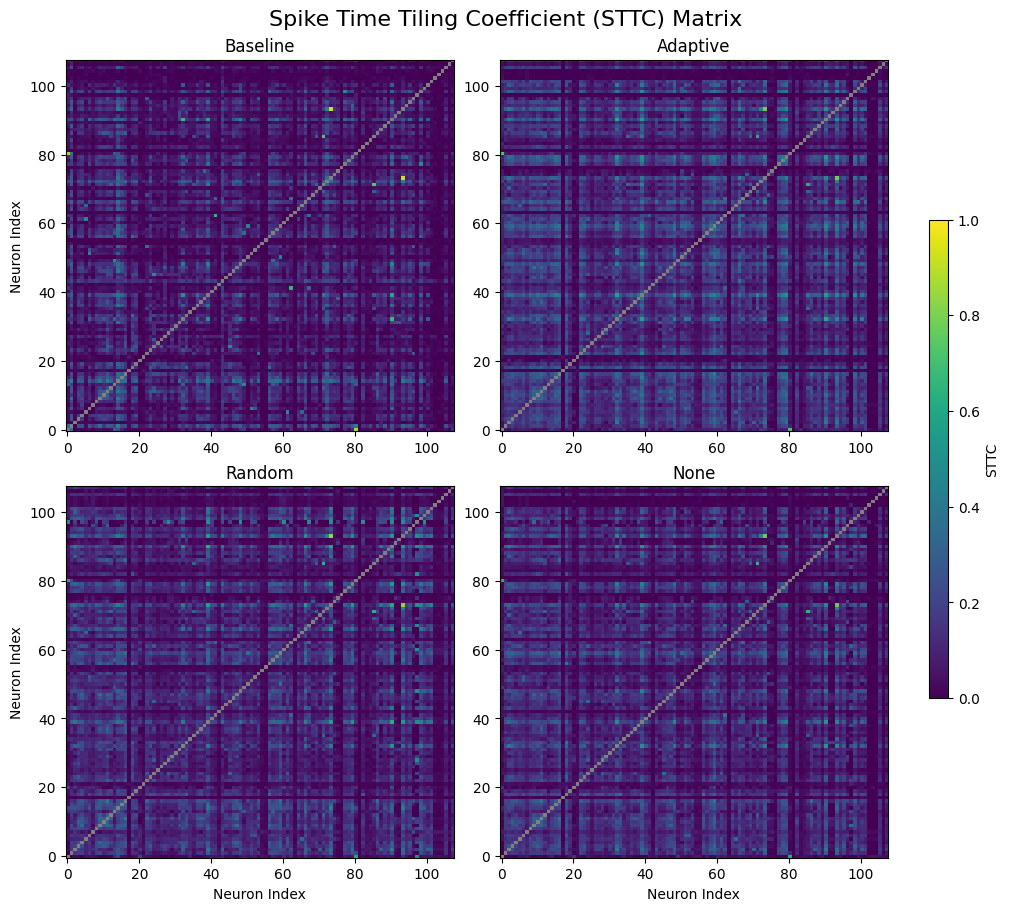

Generating Raster Plot...


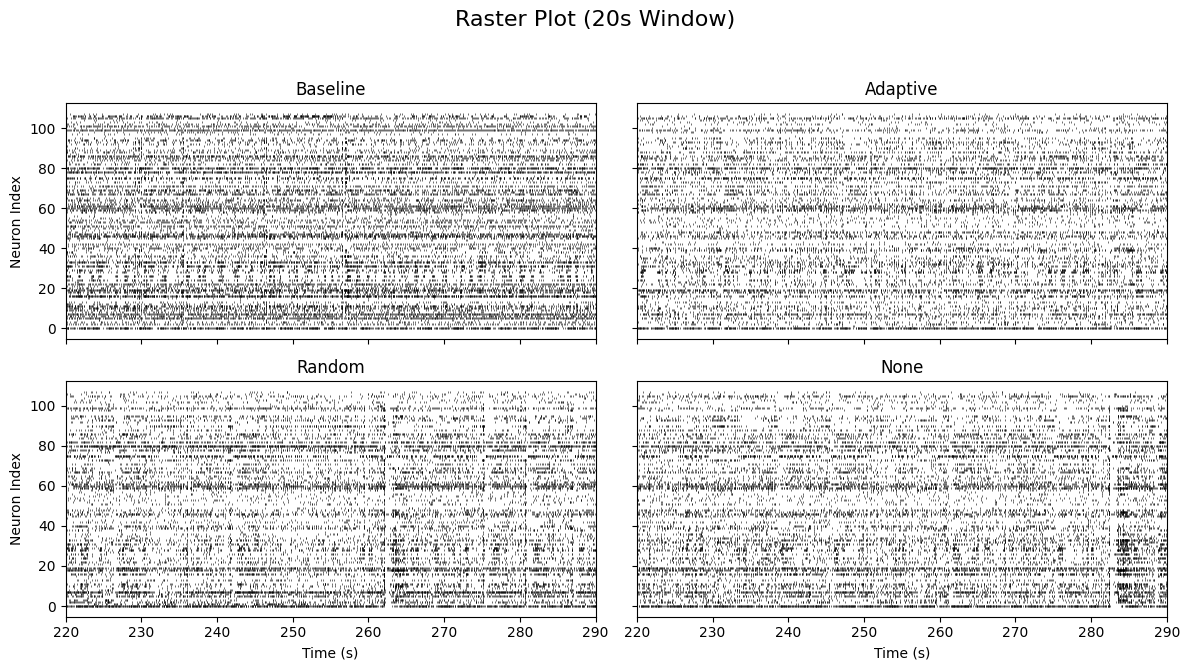

Done at: 2025/05/16 23:12:51


In [18]:
%run "cartpole_analysis_source_code.ipynb"

In [3]:
%run "organoid_training_source_code.ipynb"

Loading: organoid_training_source_code.ipynb...


ModuleNotFoundError: No module named 'food_land'

ModuleNotFoundError: No module named 'food_land'

<font color="red">**Note :** I highly recommend you go through the source code notebook on top of this one, there is a lot of code there you can draw inspiration from on top of some extra code provided for you that can give you a head start in analysis.

# <font color="red"><u> **Important :</u>** </font>Final Project

For the final, we ask you to prepare a short presentation that you will give to the rest of the class on the day of the final. In this presentation go over what occurs in the trial, what were your methods, and encodings/decodings/training signals? How did the organoid react to these, how did its structure and performance change over the course of the experiment? How do you think this structural change affects the performance? These are all good questions to tackle in this project.

This notebook, rather than being a homework, is an environment for you to go through your data and attempt analysis of it, it is essentially scratchwork. Most of your grade for this project are the report and presentation which you will find more information on here :

- [Final Project](https://docs.google.com/document/d/1B0JPPlQ4dgkSrA47y6ITRCN_mMGhs9j-bRhvImF1cIA/edit?usp=sharing)

However, like with most problems, we ask you to show your work for these projects, so this notebook will be where you submit that. I hope you enjoy working on it, from what I have gone through you have some quite interesting data! 


# Reading Material

You will be required to do extensive analysis on a organoid training dataset. We highly recommend that you read through some of the suggested papers below for inspiration and guidance. Many of these papers are from Potter's lab. He was an early pioneer in MEA stimulation.

General Reading : 
* [Maxwell Device Specs](reading_material/Maxwell_MaxOne_Specs.pdf)
* [Stim Artifact Supression](reading_material/Artifact_Supression.pdf)
* [Stimulation Reference](reading_material/Stimulation_Reference.pdf)
* [Searching for Neural Plasticity](reading_material/Searching_for_Plasticity.pdf)
* [Closed Loop Control of Neural Bursting](reading_material/Tal_Neural_Circuitry.pdf) 

Reading Relevant to Organoid Interfacing :
* [Goal Directed Learing](https://iopscience.iop.org/article/10.1088/1741-2560/5/3/004/pdf) Potter et al.
* [Moving a Robot with Neurons](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2266971/) Novellino et al.
* [Learning in Cortical Neurons](https://www.jneurosci.org/content/21/22/8782.full) Shahaf & Marom
* [Computation on Brain Organoids](https://www.nature.com/articles/s41928-023-01069-w) Cai et al.
* [Neurons Play Pong](reading_material/neuronal_pong.pdf) Kagan et al.

# Analysis

Let's familiarize yourself with the ways we can collect information from the experiment. In this part of the notebook, we will go into detail about the methods you will be using throughout the procedure and in your final writeup. 

While you read through this section, as a group, try to think about interesting ways you can use these tools to get some unique insight on the data we'll collect from the organoid recording. Are there ways to combine these tools to produce something new? A good tip is to look at the source code of the notebook and see how we find this information so you can modify it to your needs later.

Data visualization is also important, in this section we show that you can plot the STTC matrix on a graph of the organoid. What are some other metrics we could try plotting?  Also, think about what an anomaly in the data you receive might look like and what it could mean.


Select the Spike-dataset you want to work on with the following function, this will save the selected dataset in the python variable `sd_main`. Feel free to use more just this single main Spike-dataset, you may want to compare two different recordings, but this is doe to give you a simple way to load the data. We recomnend you look through the source code file for more customisable ways to load the data.

In [6]:
interact_manual( dataSelect, sd_name=datasets )

interactive(children=(Dropdown(description='sd_name', options=('Baseline', 'Dataset 6', 'Dataset 7', 'Dataset …

<function __main__.dataSelect(sd_name)>

## Multi Electrode Arrays

To gather data and interface with the organoids we are using the device you explored in the Electrophysiology homework, the CMOS multi electrode array provided by Maxwell Biosystems. Specifically, Prof. Tal Sharf used the, [Maxwell Biosystems, Maxone MEA](https://www.mxwbio.com/technology/?gclid=Cj0KCQjwr82iBhCuARIsAO0EAZw9HkpNG65Ot-iM4ZKitSkEYj4utIb3EXS6lGWZbp6G9ABrDn2UChEaAsy8EALw_wcB) to perform his Diazepam experiment. [Maxwell has a brochure](http://54.183.203.115:8888/files/work/Experiment/reading_material/Maxwell_Organoids.pdf) summarizing organoid experiments on the MaxOne.

For our experiment, there is a small rectangular surface on the MaxOne where we place our organoid. The surface of the MaxOne chip contains over 20,0000 electrodes. From this, we can select about 1,000 electrodes to record from for the experiment. The electrophysiologist running the experiment carefully selects which electrodes they want to record from. Specifically, they want to choose electrodes that are touching the neural tissue, so that they can record as much neural activity as possible. Below is the electrode layout for our cart-pole experiment. 

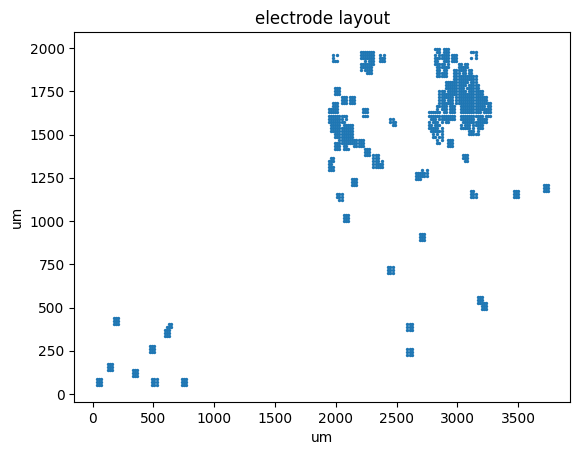

In [19]:
electrodeLayout()

For now this mapping simply shows the electrodes that have been chosen for this specific experiment, without the neural units plotted over them. We are able to record activity from the neural tissue directly over the highlighted portions of the array (shown in blue).

## Spike Sorting and  Neural Units

In a previous homework you were provided a Spike Raster, a matrix which tells you at what moment each neuron fires. How do we go from talking about raw signals recorded from 1,000 electrodes, to the spiking times of some 100 neurons? The complicated question is an active area of research in neuroscience called [spike sorting](http://www.scholarpedia.org/article/Spike_sorting). There is a [great video](https://en.wikipedia.org/wiki/Spike_sorting) on wikipedia about spikesorting. Spikesorting doesn't yet produce perfect results, so scientists still have to manually curate results. We don't actually know if the results from spikesorting are truly individual neurons (They are mostly but not always, the tech is far from perfect). For this reason, the outputted "neurons" from spikesorting are usually called **putative neurons** or **neural units**.

<p>&nbsp</p>

<center><b>Spike Sorting Diagram</b>

![alt text](https://ars.els-cdn.com/content/image/1-s2.0-S0361923015000684-gr1.jpg)

Below we see the same electrode layout as before, but this time there are red dots on it. These red dots are the places where a spikesorting algorithm believes neurons are located.

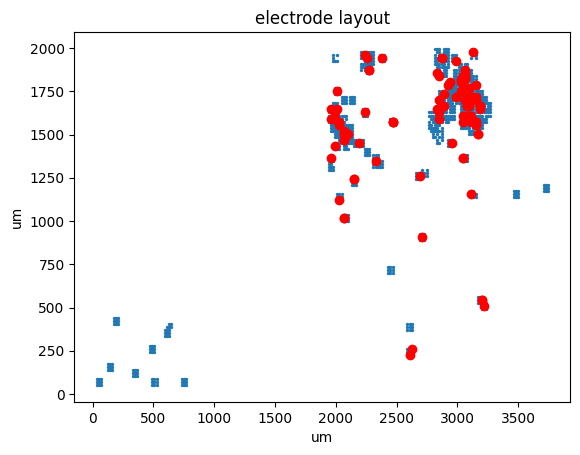

In [20]:
neuronLayout(sd_main)

You are provided the spikesorted data for you to plot out, <font color="red"><b>you do not have to do the sorting yourself</b></font>. Generally speaking, different spans of time in an experiment result in different neural units being shown, this is because their behaviour has changed throughout the course of the experiment, the neurons in the organoid will have their firing patterns changed which could result in different neural units being classified by the sorting process. However, the for our case we are using a spikesorting done through all phases of the experiment so we only have one map of the dataset's neural units.

## STTC

In the Electrophysiology HW we learned how the Spike Time Tiling Coefficient (STTC) is a measure that is similar to correlation, except with values from [0,1] instead of [-1,1]. It tells us the degree to which two neurons fire together. It represents connectivity between neuron pairs across the organoid. We can use the information from the matrix to understand the degree to which information is communicated across an organoid. 

Below is a simple interactive graphic that considers this question. In the left graph, a line is drawn between all pairs of neural units whose STTC is above some threshold. The right graph is almost the standard STTC matrix, but it displays only STTC values that are above the threshold. Notice that as you increase the threshold that the STTC must be above, the number of lines disappear from the graph. Notice also that the lines between the two organoids disappear first (threshold
$\approx$
0.5), and then, later, disappear between neurons within the same organoid (threshold 
$\approx$
 0.8). This makes logical sense. We expect there to be stronger communication between neurons that are close to each other, inside the same organoid. Neurons that are in two different organoids most likely have weaker communication between each other.

 $$
\textbf{IF:}\:\text{STTC}_{i,j}>\text{threshold},\quad\textbf{THEN:}\:\text{DrawLine}_{i,j} \quad \forall i,j\in\{\text{selected neurons}\}
$$

In [17]:
interact_manual( sttcLayout, sd=[sd_main], threshold=(0,1,.1) )

interactive(children=(Dropdown(description='sd', options=(<spikedata.spikedata.SpikeData object at 0x79b3b814d…

<function __main__.sttcLayout(sd, threshold)>

## Latencies

Using the STTC we learned a way to measure the degree to which neurons fire together. But is there actually any degree of communication between the neurons? One way to parse out this question is to see if one neuron consistently fires before the other. This is done by using a measurement called **spike time latency**, or latencies for short. 

Suppose we want to calculate the latency between some spike on a neuron ($n_1$) compared to another neuron ($n_2$). The latency is calculated by measuring the duration of time in between the spike of $n_1$ and the closest occuring spike from $n_2$. If the $n_1$ spike occurs before the $n_2$ spike this distance is positive, otherwise, the distance is negative. Doing this for all the spikes of $n_1$ we can create a histogram of the latencies between two neurons. if the histogram has mostly positive values, or mostly negative values, then we have a general notion of the direction of "information flow".

The interactive graphic below plots a histogram of the latencies between any two neural units. Try running the widget with $n_1=48$ and $n_2=38$. Notice that these two neurons that are located close to each other have latencies that are skewed negatively. Now make $n_1=38$ and $n_2=48$. Notice that the latencies are now skewed positively.

In [ ]:
interact_manual( latencyPlots, sd=[sd_main], neuron1=(0,sd_main.N-1), neuron2=(0,sd_main.N-1) )

interactive(children=(Dropdown(description='sd', options=(<spikedata.spikedata.SpikeData object at 0x79b3ae1e1…

<function __main__.latencyPlots(sd, neuron1, neuron2)>

# Experiment and Interface With the Organoid

## Neural Stimulation

The primary way the MEA allows us to interface with an organoid is by sending electrical signals to training neurons that are in said organoid. When the neurons receive these electrical signals it causes them to fire. That is why this process is called **Neural Stimulation**. Making neurons fire over and over again at specific times can permanently change the firing pattern of the neuron. This process is called **Neural Plasticity** or **Synaptic Plasticity**.

### What is a Stimulation Pulse?

A stimulation pulse occurs when we use one of the electrodes on the MEA to change the voltage for a short period of time. This change in voltage only affects neurons in the immediate vicinity of the voltage change. Below is a plot of the most common type of stimulation pulse we use for experiments. This type of pulse is called a **square wave**. We raise the voltage 150mv and then lower it by 150mv, bringing the voltage back to the resting state. In total, this pulse takes 200 μs seconds from start to finish. Note that μs means microseconds, where there are 1000 microseconds in a millisecond. Notice that this pulse resembles the change in mV seen when a  [neuron spikes](https://en.wikipedia.org/wiki/Action_potential).

<p>&nbsp</p>
<center><b> A square Wave plotted over time:

<center>

![SquareWave](.images/Stim_Pulse_downsized.png)

<b>Note:</b> if you would like to see the code used to generate this square wave, the function definition for it can be found in the source code under the section : "Stim Pulses -> Legacy"

For the purpose of this experiment, you'll mainly want to concern yourself with the frequency of your stim pulses, measured in Hertz (Hz) = cycles per second.

### Creating a Stim Pulse

To encode and train your organoid you will need to know how to create stim pulses in python. So while we're on the subject, let's discuss that. You will create something called a stim protocol, which in code is essentially a fancy list that our software can parse to send specific pulses through the MEA to the on-chip culture.

The stim pulses you write can be simple, just consisting of one repeating pulse : 

In [ ]:
stim_pattern1 = []
stim_pattern1.append(('stim',[0],150,100))

print(stim_pattern1)

[('stim', [0], 150, 100)]


We can use the function `create_stim_pulse_sequence()` to see our signal plotted out :

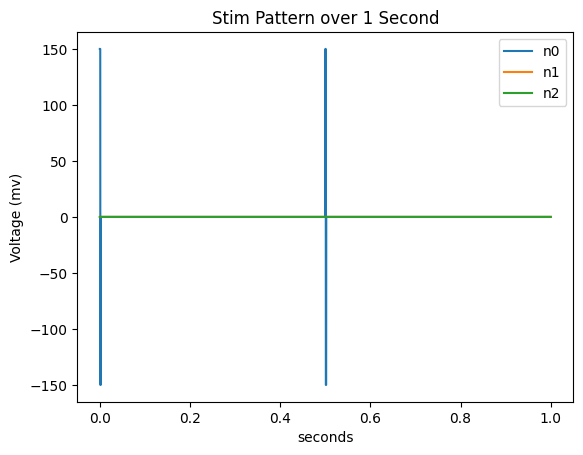

In [ ]:
signal,t = create_stim_pulse_sequence(stim_pattern1, freq_Hz=2)
plotStimPattern(signal,t)

Or they can be more complex with many patterns within them, stimulating multiple neural units : 

In [ ]:
stim_pattern2 = []
stim_pattern2.append(('stim',[0],100,200))
stim_pattern2.append(('delay',200))
stim_pattern2.append(('stim',[1],150,300))

print(stim_pattern2)

[('stim', [0], 100, 200), ('delay', 200), ('stim', [1], 150, 300)]


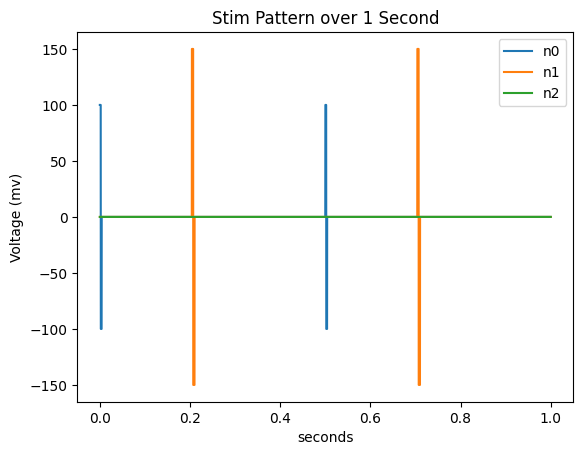

In [ ]:
signal,t = create_stim_pulse_sequence(stim_pattern2, freq_Hz=2)
plotStimPattern(signal,t)

In this protocol. $n_0$ is stimulated at 100mV for 200μs. We wait 200ms. Then $n_1$ is stimulated at 150mV for 300μs. This protocol is repeated at a frequency of 2Hz, which means that the stim pattern occurs twice a second. Below is a slightly more complicated stimulation protocol.

Here are a few more examples of creating stim patterns so you become accustomed to the process : 

In [ ]:
# ------------------------------- Example 1 -------------------------------

training_neurons = [0,1,2]
amp_mv = 400 # milivolts for stimulation
phase_width = 200 # microseconds for stimulation

example1 = [('stim',training_neurons, amp_mv, phase_width)] # instead if you were working with a class you could use self.training_neurons
print(example1)


# ------------------------------- Example 2 -------------------------------

example2 = []
example2.append(('stim',[0,1,2],150,200)) # stim neurons 0,1,2 with 150 mV and 200 us
example2.append(('delay',5)) # delay 5 ms
example2.append(('stim',[1],150,200)) # stim neuron 1 with 150 mV and 200 us
example2.append(('delay',15)) # delay 15 ms
example2.append(('stim',[0,2],150,200)) # stim neurons 0,2 with 150 mV and 200 us
print(example2)

[('stim', [0, 1, 2], 400, 200)]
[('stim', [0, 1, 2], 150, 200), ('delay', 5), ('stim', [1], 150, 200), ('delay', 15), ('stim', [0, 2], 150, 200)]


Now we can plot these signals so you can see how they look!

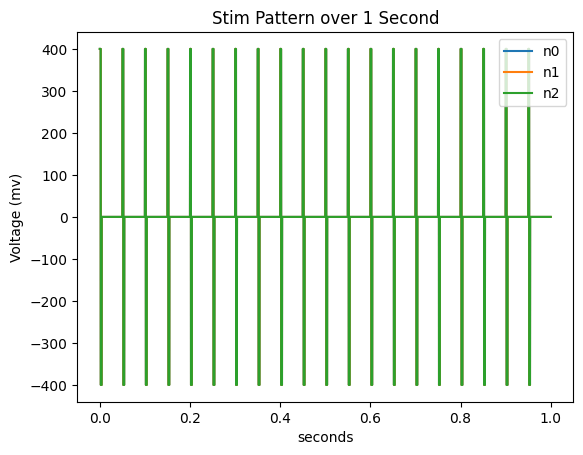

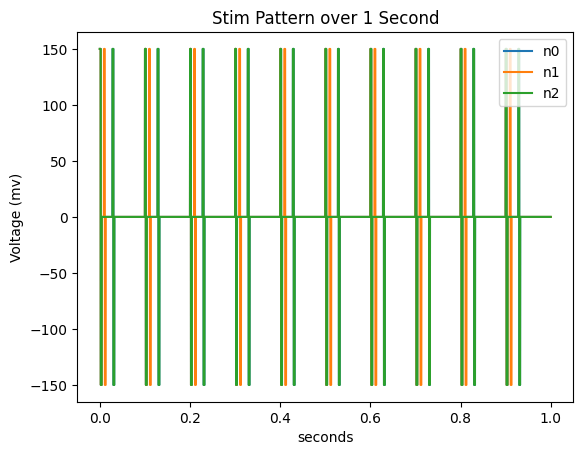

In [ ]:
signal1,t1 = create_stim_pulse_sequence(example1, freq_Hz=20)
signal2,t2 = create_stim_pulse_sequence(example2, freq_Hz=10)
plotStimPattern(signal1,t1)
plotStimPattern(signal2,t2)

Since example 2 is so complex it may be work to plot the pulses on each neuron separately. Use the following function when drafting stim pulses for your experiment if you want!

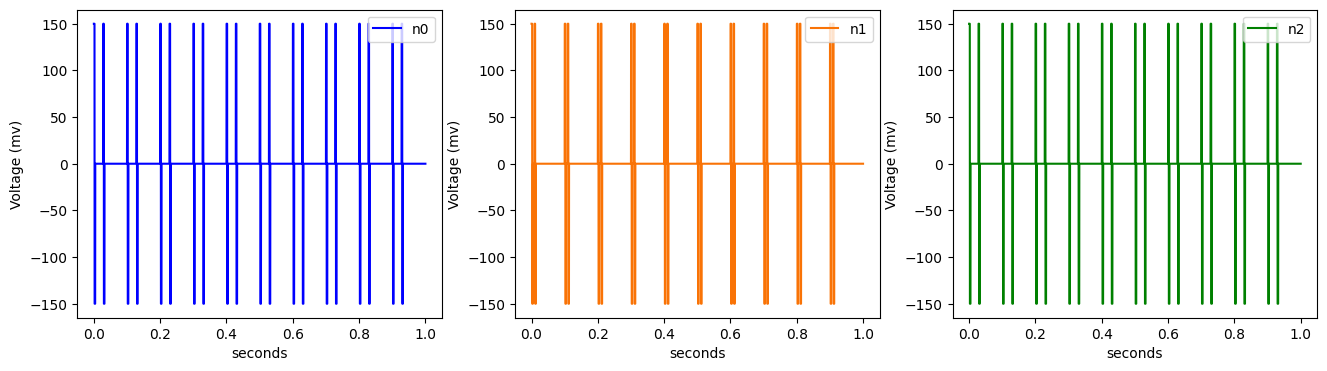

In [ ]:
plotIndividualPatterns(signal2,t2)

A simpler method to send signals to an organoid is by calling `self.sensory_stim_Hz` and modifying its array. This does not let you have as much control as with the other methods but if you are just wanting to encode something via frequency this may be the better method to use.

<pre> self.sensory_stim_Hz["neuron in array to stim here"] = "frequency in hertz to stim at" 

Here is an example of how to use this function: `self.sensory_stim_Hz[0] = 20`

Some final important info, do not stimulate your organoid with long high voltage pulses or very high frequencies. This will cause the neuron firing in the organoid to tire out, this will not only make the organoid "sluggish" when trying to play Foodland, but might also damage it. <font color="red"> Do not use voltages over 150 mV and frequencies above 30 Hz, nor overly long stim phases.</font> Generally you will want to stay around 10 Hz, but training signals can go higher.  

# Other Analysis

Select the Spike-dataset you want to work on with the following function, this will save the selected dataset in the python variable `sd_main`. Feel free to use more just this single main Spike-dataset, you may want to compare two different recordings, but this is doe to give you a simple way to load the data. We recomnend you look through the source code file for more customisable ways to load the data.

In [3]:
interact_manual( dataSelect, sd_name=datasets )

interactive(children=(Dropdown(description='sd_name', options=('Baseline', 'Dataset 6', 'Dataset 7', 'Dataset …

<function __main__.dataSelect(sd_name)>

## Basic Analysis

To get you started, we've provided the basic methods of data analysis you learned throughout the previous homeworks. Look through these plots for an initial pass of the data and make sure to mention any findings from here you see as important in your final report, however using only these analysis techniques for your final project will not result in full marks. 

The following plot will display the spike raster for the selected dataset, if analyze is true it will also plot the population firing rate over the raster. 

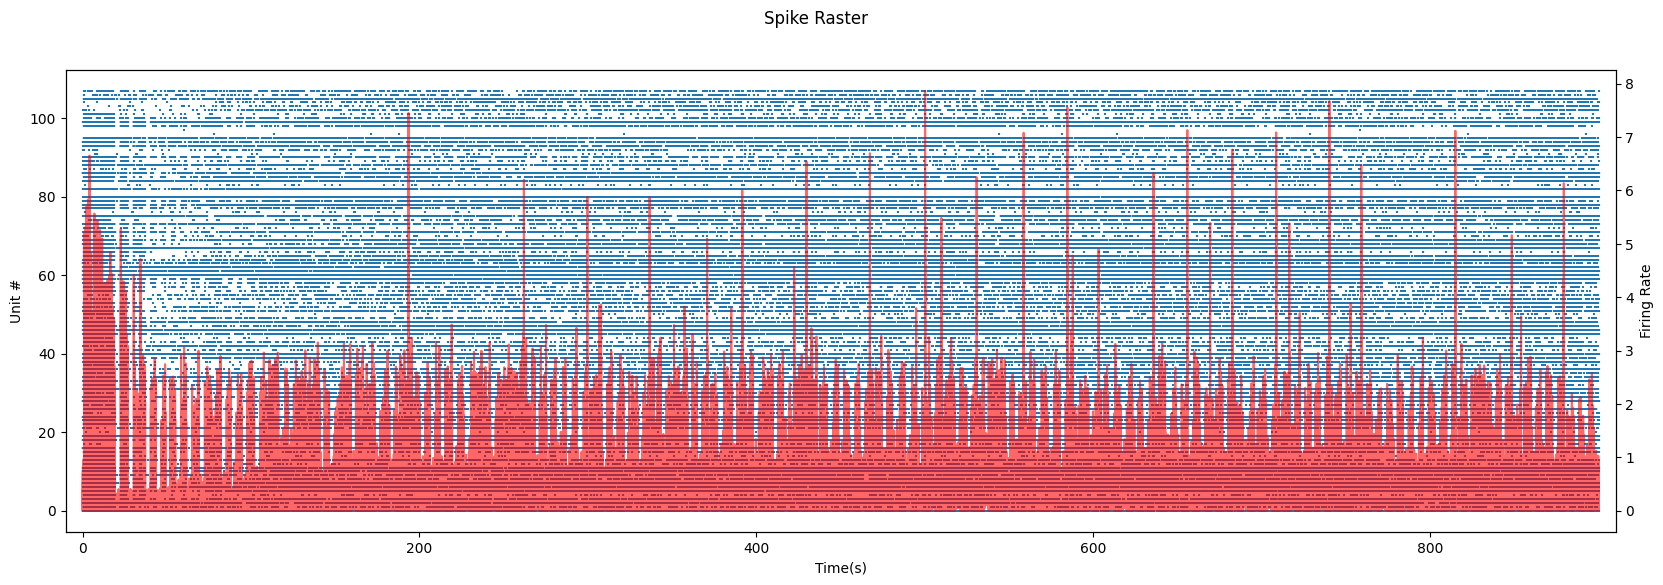

In [ ]:
plot_raster_pretty(sd_main, analyze=True)

This function plots the interspike interval of the recording

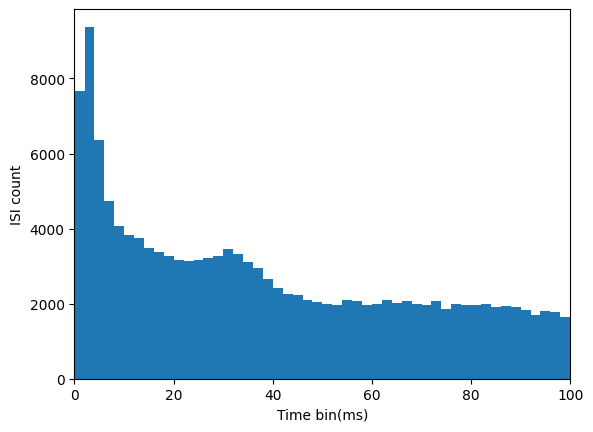

In [18]:
interspike(sd_main)

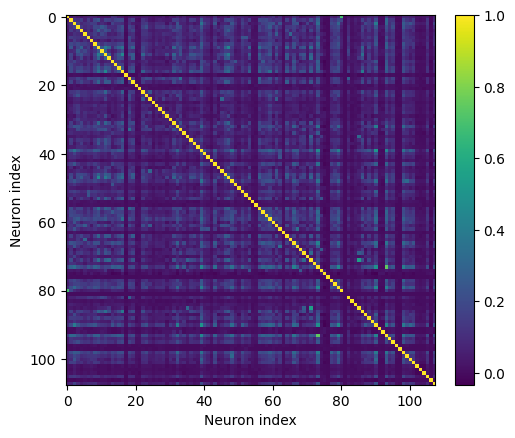

In [14]:
correlation_plot(sd_main)

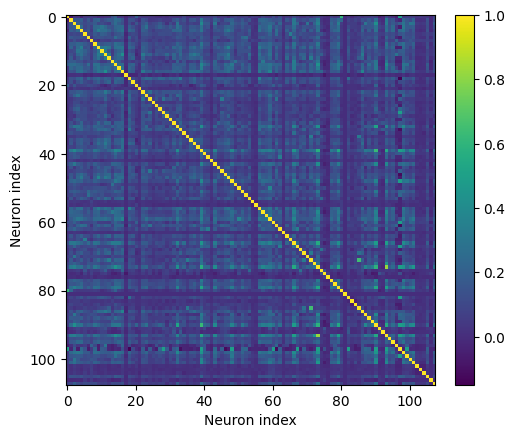

In [15]:
STTC_plot(sd_main)

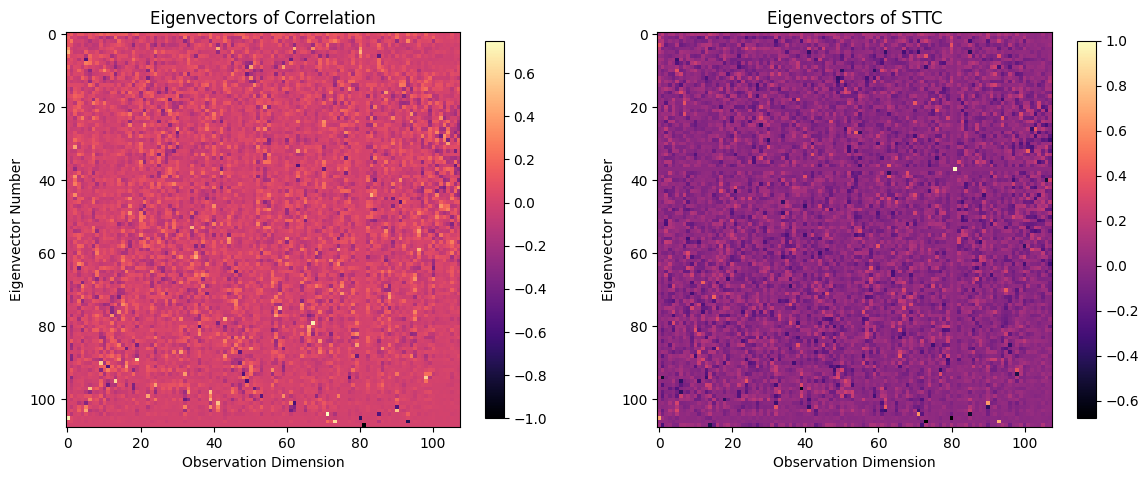

In [17]:
plot_evectmatrix(baseline_sd)
#plot_evectmatrix(sd_post)

In a previous homework, we delved into the subject of the correlation and Spike Time Tiling Coefficient matrices. These can be useful tools to understanding the relationships of the neurons in the culture, specifically how they act together in unison. However when looking at these matrices It can be somewhat difficult to glean specific structures from them, but them being matrices, diagonal matrices to be specific, allows us to harness an important aspect of linear algebra to simplify their information. 

# Dimensional Reductions:

# <font color="red">Your Analysis Code

<font color="red"> We expect you to keep a record of all the code you used for analysis inside of this repository, `Final_Project_Spring2024`. We recommend putting all your code below, however, you're allowed to break your code up into different notebooks/python files if you like. Please make sure your code is well documented and runs properly. It should contain numerous comments explaining what each piece does as well as instructions on how to run the code (if not obvious). **You will be graded on the cleanliness and runnability of the code** you submit for your final project. It's only necessary to record the code used to create figures/tables in your paper or presentation. Other exploratory code can be deleted, however, feel free to keep it if you're proud of it.